In [5]:
import pyhepmc
import pandas as pd
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [6]:
pid = 1000015
statuses = [22, 51, 52]
toGeV = 1000.

staus = []

In [9]:
with pyhepmc.open("/home/tate/MG5_aMC_v3_5_1/muon_to_stau_decay/Events/run_11/tag_1_pythia8_events.hepmc") as f:
    while True:
        evt = f.read()
        if not evt:
            break
        
        for particle in evt.particles[:10]:
            if abs(particle.pid) != pid : continue 
            if particle.status not in statuses : continue

            stau = {}
            
            particlemom = particle.momentum
            stau["eta"] = particlemom.eta()
            stau["phi"] = particlemom.phi()
            stau["pt" ] = particlemom.pt()/toGeV
            stau["p"  ] = particlemom.length()/toGeV
            stau["m"  ] = particlemom.m()/toGeV
            stau["betagamma"]  = stau["p"]/stau["m"] 
            stau["prodvtx"] = particle.production_vertex.position
            stau["decayvtx"] = particle.end_vertex.position

            #print(stau)

            staus.append(stau)
    print(len(staus))

    data = {
        "staus" : staus
    }
    
    #print(data)
    #print(data["staus"][1]["eta"])

    #putting stau info into lists
    eta = []
    phi = []
    pt = []
    p = []
    m = []
    betagamma = []
    prodvtx = []
    decayvtx = []
    
    for i in range(0,len(staus)):
        eta.append(data["staus"][i]["eta"])
        phi.append(data["staus"][i]["phi"])
        pt.append(data["staus"][i]["pt"])
        p.append(data["staus"][i]["p"])
        m.append(data["staus"][i]["m"])
        betagamma.append(data["staus"][i]["betagamma"])
        prodvtx.append(data["staus"][i]["prodvtx"])
        decayvtx.append(data["staus"][i]["decayvtx"])
        

116022


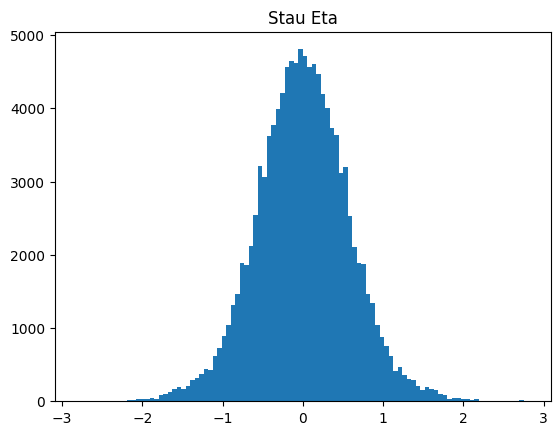

In [10]:
#initial plots to check
plt.hist(eta, bins=100)
plt.title("Stau Eta")
plt.show()

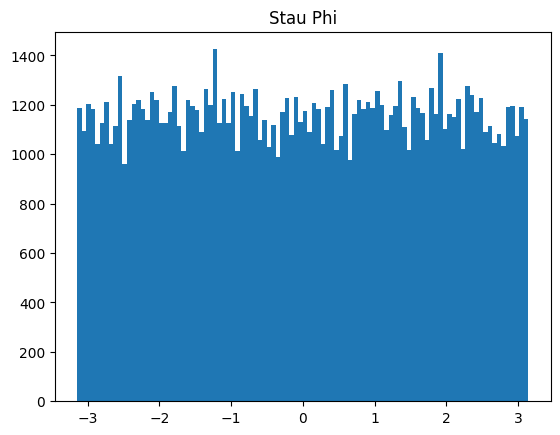

In [11]:
plt.hist(phi, bins=100)
plt.title("Stau Phi")
plt.show()

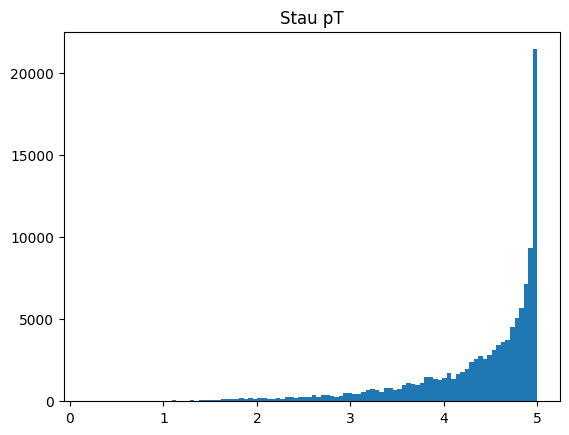

In [12]:
plt.hist(pt, bins=100)
plt.title("Stau pT")
plt.show()

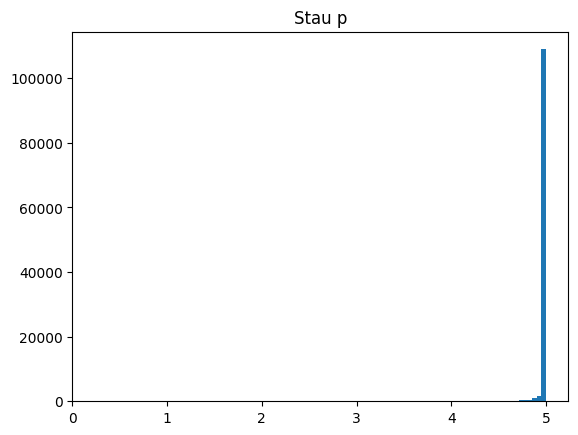

In [13]:
plt.hist(p, bins=100)
plt.title("Stau p")
plt.show()

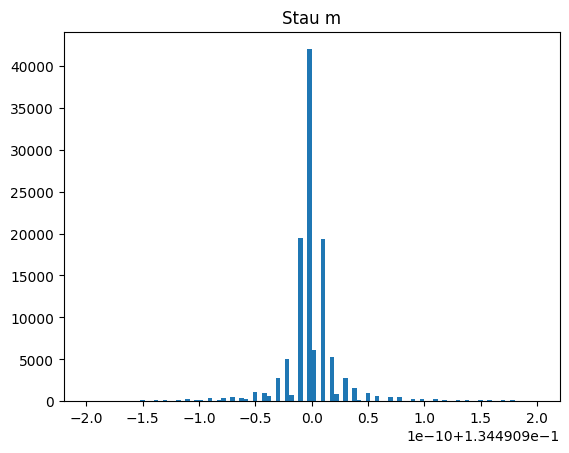

In [14]:
plt.hist(m, bins=100)
plt.title("Stau m")
plt.show()

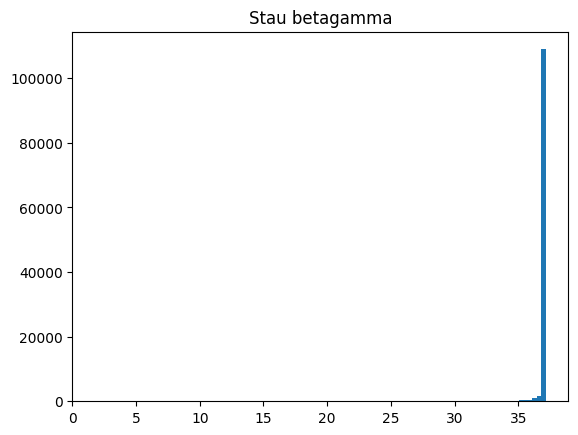

In [15]:
plt.hist(betagamma, bins=100)
plt.title("Stau betagamma")
plt.show()

In [ ]:
#since prodvtx is always 0, plotting decayvtx will give an idea of how many staus are long-lived

plt.hist(decayvtx, bins=100)
plt.title("Stau Decay Vertex Position")
plt.show()

In [ ]:
#ask: why does len(staus) change every time I run?